## Here we visualise characteristics of the audio files across the 2 classes

In [66]:
import numpy as np
import librosa
import model as mod
from ConfigBuilder import ConfigBuilder
import matplotlib.pyplot as plt

### Initialise dataset parameters

In [4]:
params = {
    "group_speakers_by_id":  True,
    "silence_prob":  0.0,
    "noise_prob":  0.0,
    "input_length":  8000,
    "timeshift_ms": 100,
    "unknown_prob" :0.0,
    "train_pct": 80,
    "dev_pct": 5,
    "test_pct": 40,
    "wanted_words": ["normal", "asphyxia"],
    "data_folder": "/mnt/hdd/Datasets/chillanto-8k-16bit-renamed",
    "sampling_freq": 8000,
    "n_dct_filters": 40,
    "n_mels": 40,
    "window_size_ms": 30,
    "frame_shift_ms": 10,
    "cache_size": 32768,
}
builder = ConfigBuilder(
    params,
)
parser = builder.build_argparse()
config = builder.config_from_argparse(parser)

labels are:  {'normal': 2, 'asphyxia': 3, '__silence__': 0, '__unknown__': 1}


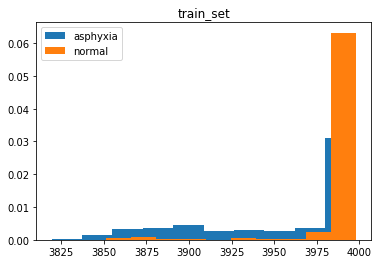

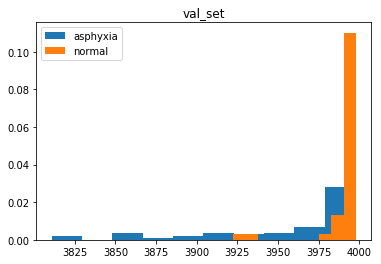

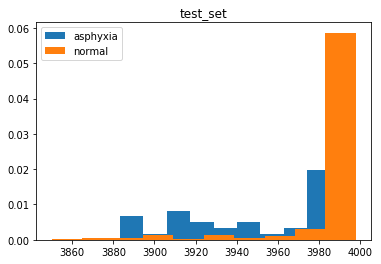

In [82]:
normal_idx = 2
asphyxia_idx = 3

train_set, val_set, test_set = mod.SpeechDataset.splits(config)

for set_name, data_set in zip(["train_set", "val_set", "test_set"], [train_set, val_set, test_set]):
    max_pitch_normal = []
    max_pitch_asphyxia = []
    for audio_file, audio_label in zip(data_set.audio_files, data_set.audio_labels):
        y, sr = librosa.load(audio_file, sr=8000)
        pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, S=None, n_fft=2048, hop_length=None,
                     fmin=150.0, fmax=4000.0, threshold=0.001)
        max_pitch = np.max(pitches[pitches != 0])
        if audio_label == normal_idx:
            max_pitch_normal.append(max_pitch)
        elif audio_label == asphyxia_idx:
            max_pitch_asphyxia.append(max_pitch)

    plt.hist(max_pitch_asphyxia, bins=10, label='asphyxia', density=True)  
    plt.hist(max_pitch_normal, bins=10, label='normal', density=True)
#     plt.xlim([3825, 4000])
    plt.title(set_name)
    plt.legend(loc=2)
    plt.show()

### Visualise the distribution of maximum and minimum instantaneous frequency.

In [58]:
np.max(pitches_non_zero)

3991.7954

### Visualise the distribution of magnitude at maximum and minimum instantaneous frequency.